In [7]:
# imports

import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math 
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import to_categorical


#integer based indexing 
#These are 0-based indexing

data=pd.read_csv(r"C:\Users\hp\Desktop\seminar\winequality-red (1).csv")
x=data.iloc[:,:].values
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values


#Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, 
#can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories,
#in the data.

y = to_categorical(y)


#Split arrays or matrices into random train and test subsets
#Here the test is 20% of the total data and train is 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 


#scaling to prevent biasing of any column in the model
#Standardization can be achieved by StandardScaler
#find parameters about some data and to reuse them exactly to transform other data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


#artificial nueral network 
# 4-layered model sequential model which are training
# The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly, 
#if it is positive, otherwise, it will output zero.
# The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values, 
#between 0 and 1, so that they can be interpreted as probabilities.

ann = Sequential()

#15 nuerons
ann.add(Dense(units = 15, activation = 'relu'))

ann.add(Dense(units = 25, activation = 'relu'))

ann.add(Dense(units = 12, activation = 'relu'))

ann.add(Dense(units = 9, activation="softmax"))

ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

#fiitng our ann to the training set
#X_train represents the independent variables we’re using to train our ANN, and y_train represents the column we’re predicting. 
#Epochs represents the number of times we’re going to pass our full dataset through the ANN. 
#Batch_size is the number of observations after which the weights will be updated

ann.fit(X_train, y_train, batch_size = 32, epochs = 287)


#predicting using the training set

y_pred = ann.predict(X_test)


#predicted value of y will be stored in the below list
l=[]

#testing value of y will be stored in the below list
l1=[]

for i in range(len(y_pred)):
    for j in range(9):
        if y_pred[i][j]==max(y_pred[i]):
            y_pred[i][j]=1
            l.append(j)
        else:
            y_pred[i][j]=0

l=np.array(l)

for i in range(len(y_test)):
    for j in range(9):
        if y_test[i][j]==max(y_test[i]):
            y_test[i][j]=1
            l1.append(j)
        else:
            y_test[i][j]=0
            
l1=np.array(l1)

Epoch 1/287
40/40 [==============================] - 0s 835us/step - loss: 0.0971 - accuracy: 0.2791
Epoch 2/287
40/40 [==============================] - 0s 912us/step - loss: 0.0839 - accuracy: 0.4378
Epoch 3/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.4707
Epoch 4/287
40/40 [==============================] - 0s 983us/step - loss: 0.0651 - accuracy: 0.5434
Epoch 5/287
40/40 [==============================] - 0s 994us/step - loss: 0.0617 - accuracy: 0.5841
Epoch 6/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0603 - accuracy: 0.5895
Epoch 7/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.5864
Epoch 8/287
40/40 [==============================] - 0s 981us/step - loss: 0.0591 - accuracy: 0.5841
Epoch 9/287
40/40 [==============================] - 0s 978us/step - loss: 0.0587 - accuracy: 0.5981
Epoch 10/287
40/40 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.59 - 0

40/40 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.7193
Epoch 82/287
40/40 [==============================] - 0s 921us/step - loss: 0.0465 - accuracy: 0.7201
Epoch 83/287
40/40 [==============================] - 0s 460us/step - loss: 0.0464 - accuracy: 0.7123
Epoch 84/287
40/40 [==============================] - 0s 526us/step - loss: 0.0462 - accuracy: 0.7193
Epoch 85/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.7240
Epoch 86/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.7240
Epoch 87/287
40/40 [==============================] - 0s 854us/step - loss: 0.0458 - accuracy: 0.7224
Epoch 88/287
40/40 [==============================] - 0s 856us/step - loss: 0.0459 - accuracy: 0.7170
Epoch 89/287
40/40 [==============================] - 0s 838us/step - loss: 0.0459 - accuracy: 0.7217
Epoch 90/287
40/40 [==============================] - 0s 921us/step - loss: 0.0457 - accuracy: 0.7217

40/40 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.7662
Epoch 162/287
40/40 [==============================] - 0s 991us/step - loss: 0.0401 - accuracy: 0.7740
Epoch 163/287
40/40 [==============================] - 0s 962us/step - loss: 0.0399 - accuracy: 0.7740
Epoch 164/287
40/40 [==============================] - 0s 952us/step - loss: 0.0405 - accuracy: 0.7584
Epoch 165/287
40/40 [==============================] - 0s 978us/step - loss: 0.0398 - accuracy: 0.7694
Epoch 166/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.7662
Epoch 167/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.7686
Epoch 168/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.7733
Epoch 169/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 0.7787
Epoch 170/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.7

40/40 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.8186
Epoch 242/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.8116
Epoch 243/287
40/40 [==============================] - 0s 876us/step - loss: 0.0351 - accuracy: 0.8155
Epoch 244/287
40/40 [==============================] - 0s 929us/step - loss: 0.0348 - accuracy: 0.8100
Epoch 245/287
40/40 [==============================] - 0s 907us/step - loss: 0.0349 - accuracy: 0.8194
Epoch 246/287
40/40 [==============================] - 0s 992us/step - loss: 0.0346 - accuracy: 0.8139
Epoch 247/287
40/40 [==============================] - 0s 905us/step - loss: 0.0349 - accuracy: 0.8092
Epoch 248/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.8139
Epoch 249/287
40/40 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.8170
Epoch 250/287
40/40 [==============================] - 0s 978us/step - loss: 0.0346 - accuracy:

In [8]:
# two lists will be printed
 #1.predicted value of y
 #2.testing value of y
#can be compared using the same index or position of the list
print(l1,l)


[6 5 7 6 5 6 5 6 4 5 5 5 6 5 6 6 7 5 5 4 7 6 6 4 6 5 5 7 5 6 5 6 5 6 7 7 5
 6 6 7 5 7 6 6 5 5 6 6 6 5 5 5 6 6 6 5 5 5 6 5 5 6 6 6 5 6 5 5 6 6 6 6 4 6
 5 6 5 5 5 6 6 5 6 6 6 5 6 5 5 5 5 6 4 5 7 6 6 5 6 5 8 6 6 6 5 5 5 5 7 5 6
 5 7 5 6 6 6 7 6 6 5 7 5 5 6 6 5 5 5 6 6 6 6 6 6 5 6 5 8 5 6 5 6 5 4 6 7 6
 5 6 6 5 5 5 6 6 3 6 6 6 6 6 6 6 5 5 6 6 6 6 5 5 5 8 5 6 6 7 7 5 5 7 5 6 6
 4 5 6 5 5 6 5 6 6 5 5 5 5 5 5 5 6 6 5 6 6 5 6 7 6 6 6 5 5 5 6 5 6 6 5 5 5
 6 6 5 6 6 6 3 6 5 5 7 6 7 6 6 7 7 6 5 6 5 5 6 5 5 5 5 6 5 5 5 6 6 5 5 5 6
 7 5 6 5 6 5 4 5 5 6 7 6 5 5 4 5 6 7 6 6 7 5 7 5 6 6 5 5 5 6 6 5 6 6 6 5 6
 6 5 6 5 6 5 6 6 6 6 5 5 6 5 5 6 5 5 5 6 4 5 4 6] [5 5 7 5 6 6 5 6 5 5 5 5 5 4 6 6 7 5 5 6 7 5 6 6 5 5 5 7 5 5 6 6 5 5 6 6 5
 6 5 6 5 7 6 7 6 5 5 5 5 6 5 5 6 6 6 5 5 5 7 6 6 6 7 6 5 6 5 5 7 7 5 5 5 5
 6 5 5 5 5 7 5 5 6 6 6 6 6 5 5 5 5 5 5 6 5 5 7 5 5 5 7 6 5 6 5 5 5 5 6 5 6
 5 7 5 6 7 6 7 7 6 5 6 5 5 7 7 5 5 6 6 5 5 6 6 6 5 6 5 6 5 6 5 5 6 5 6 7 7
 6 5 6 5 5 5 7 5 5 5 5 6 5 5 5 6 6 5 6 6 5 6 5 6 5

In [7]:
print(len(y[0]))

9


In [9]:
#displays all the lists containing the predicted value of y at index 0 and tested vale of y at index 1
ans=[]
for i in range(len(l1)):
    l3=[]
    l3.append(l1[i])
    l3.append(l[i])
    ans.append(l3)
    
ans

[[6, 5],
 [5, 5],
 [7, 7],
 [6, 5],
 [5, 6],
 [6, 6],
 [5, 5],
 [6, 6],
 [4, 5],
 [5, 5],
 [5, 5],
 [5, 5],
 [6, 5],
 [5, 4],
 [6, 6],
 [6, 6],
 [7, 7],
 [5, 5],
 [5, 5],
 [4, 6],
 [7, 7],
 [6, 5],
 [6, 6],
 [4, 6],
 [6, 5],
 [5, 5],
 [5, 5],
 [7, 7],
 [5, 5],
 [6, 5],
 [5, 6],
 [6, 6],
 [5, 5],
 [6, 5],
 [7, 6],
 [7, 6],
 [5, 5],
 [6, 6],
 [6, 5],
 [7, 6],
 [5, 5],
 [7, 7],
 [6, 6],
 [6, 7],
 [5, 6],
 [5, 5],
 [6, 5],
 [6, 5],
 [6, 5],
 [5, 6],
 [5, 5],
 [5, 5],
 [6, 6],
 [6, 6],
 [6, 6],
 [5, 5],
 [5, 5],
 [5, 5],
 [6, 7],
 [5, 6],
 [5, 6],
 [6, 6],
 [6, 7],
 [6, 6],
 [5, 5],
 [6, 6],
 [5, 5],
 [5, 5],
 [6, 7],
 [6, 7],
 [6, 5],
 [6, 5],
 [4, 5],
 [6, 5],
 [5, 6],
 [6, 5],
 [5, 5],
 [5, 5],
 [5, 5],
 [6, 7],
 [6, 5],
 [5, 5],
 [6, 6],
 [6, 6],
 [6, 6],
 [5, 6],
 [6, 6],
 [5, 5],
 [5, 5],
 [5, 5],
 [5, 5],
 [6, 5],
 [4, 5],
 [5, 6],
 [7, 5],
 [6, 5],
 [6, 7],
 [5, 5],
 [6, 5],
 [5, 5],
 [8, 7],
 [6, 6],
 [6, 5],
 [6, 6],
 [5, 5],
 [5, 5],
 [5, 5],
 [5, 5],
 [7, 6],
 [5, 5],
 [6, 6],
 

In [47]:
#predicts the value if all the 11 parameters are entered by the user
value=0
user=[]
for i in range(11):
    b=float(input())
    user.append(b)
a=ann.predict(sc.fit_transform([user]))
print (a)

value=0
a=a.flatten()
for j in range(9):
    if a[j]==max(a):
        value=j
print (value)


7.8
0.6
0.14
2.4
0.086
3
15
0.9975
3.42
0.6
10.8
[[0.00649286 0.00720373 0.01642629 0.00756499 0.08287665 0.41285402
  0.3821511  0.06659079 0.01783962]]
5


In [44]:
value=0
a=a.flatten()
for j in range(9):
    if a[j]==max(a):
        value=j
print (value)

6


In [59]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.89      0.93      0.91       135
           6       0.89      0.90      0.90       142
           7       0.58      0.78      0.67        27
           8       0.00      0.00      0.00         3

   micro avg       0.86      0.86      0.86       320
   macro avg       0.26      0.29      0.27       320
weighted avg       0.82      0.86      0.84       320
 samples avg       0.86      0.86      0.86       320



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


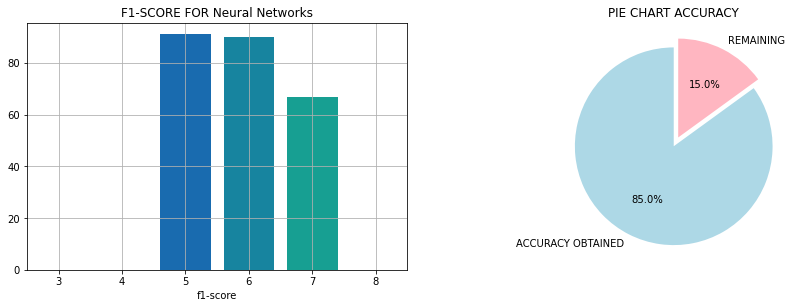

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
a1 = [3,4,5,6,7,8]
n1 = [0, 0, 91,90,67,0]
labels = ['ACCURACY OBTAINED', 'REMAINING']
a2 = [85,15]
explode = [0,0.1]
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title('F1-SCORE FOR Neural Networks')
sns.barplot(x = a1, y = n1, palette = 'winter')
plt.xlabel('Classifiers')
plt.xlabel('f1-score')
plt.grid()
plt.subplot(2,2,2)
plt.pie(a2, labels = labels, startangle = 90, autopct = "%0.1f%%", explode = explode, colors= ['lightblue', 'lightpink'])
plt.title('PIE CHART ACCURACY')
plt.show
plt.show()

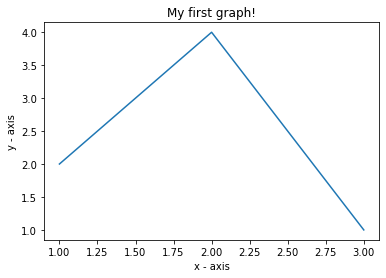

In [15]:
# importing the required module 
import matplotlib.pyplot as plt 

# x axis values 
x = [1,2,3] 
# corresponding y axis values 
y = [2,4,1] 

# plotting the points 
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('My first graph!') 

# function to show the plot 
plt.show() 


In [21]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


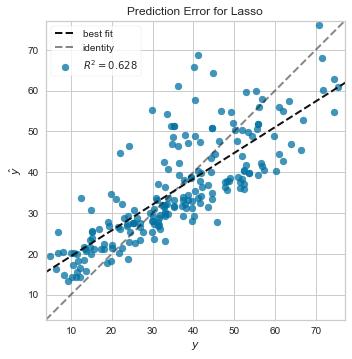

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    